In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as skt

- Após agrupar as bases relacionadas a Docentes de 2013 a 2019, criei o dataset único abaixo:

In [ ]:
path = '/content/drive/My Drive/bases_capesppg_docentes/capesppg_docentes_2013-2019.csv'
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- Visualizando os dados do dataset:

In [ ]:
df.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,832956,FEMININO,1975,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,AVALIAÇÃO
1,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,34738,MASCULINO,1978,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO
2,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,729344,MASCULINO,1954,55 A 59 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,BRASIL,AVALIAÇÃO
3,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,526496,FEMININO,1966,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,NaN,S,1999.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO
4,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,10229,MASCULINO,1928,70 OU MAIS,BRASIL,APOSENTADO,PARCIAL,NaN,S,1960.0,DOUTORADO,USP,UNIVERSIDADE DE SÃO PAULO,BRASIL,AVALIAÇÃO


- Demonstrando de forma visual que há dados dos anos 2013 à 2019 neste dataset:

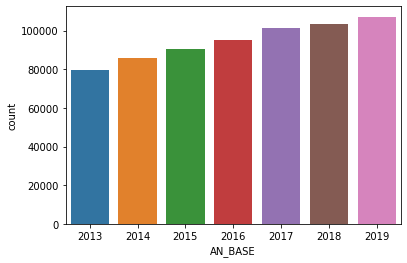

In [ ]:
sns.countplot(x='AN_BASE', data = df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662665 entries, 0 to 662664
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AN_BASE                        662665 non-null  int64  
 1   CD_AREA_AVALIACAO              662665 non-null  int64  
 2   NM_AREA_AVALIACAO              662665 non-null  object 
 3   NM_GRANDE_AREA_CONHECIMENTO    662665 non-null  object 
 4   NM_AREA_CONHECIMENTO           662665 non-null  object 
 5   CD_PROGRAMA_IES                662665 non-null  object 
 6   NM_PROGRAMA_IES                662665 non-null  object 
 7   NM_GRAU_PROGRAMA               662665 non-null  object 
 8   NM_MODALIDADE_PROGRAMA         662665 non-null  object 
 9   CD_CONCEITO_PROGRAMA           662665 non-null  object 
 10  SG_ENTIDADE_ENSINO             662665 non-null  object 
 11  NM_ENTIDADE_ENSINO             662665 non-null  object 
 12  CS_STATUS_JURIDICO            

- Agrupando os dados por Programa de Pós Graduação

In [ ]:
#resolvi agrupar depois da exclusao dos conceitos com erro

#df1 = df.groupby('CD_PROGRAMA_IES',as_index=False)
#df1.first() 

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,10001018002P1,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,832956,FEMININO,1975,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,2,S,2008.0,DOUTORADO,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,AVALIAÇÃO
1,10001018004P4,2013,45,INTERDISCIPLINAR,MULTIDISCIPLINAR,MEIO AMBIENTE E AGRÁRIAS,DESENVOLVIMENTO REGIONAL E MEIO AMBIENTE,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,10222,MASCULINO,1954,55 A 59 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,2,S,1998.0,DOUTORADO,UNESP/RC,UNIVERSIDADE EST.PAULISTA JÚLIO DE MESQUITA FI...,BRASIL,AVALIAÇÃO
2,10001018005P0,2013,36,GEOGRAFIA,CIÊNCIAS HUMANAS,GEOGRAFIA,GEOGRAFIA,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,9039,FEMININO,1964,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,1A,S,2004.0,DOUTORADO,UFPA,UNIVERSIDADE FEDERAL DO PARÁ,BRASIL,AVALIAÇÃO
3,10001018006P7,2013,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,ADMINISTRAÇÃO,MESTRADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,775921,MASCULINO,1954,55 A 59 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,1D,S,2010.0,DOUTORADO,UAA,UNIVERSIDAD AUTÓNOMA DE ASUNCIÓN,PARAGUAI,AVALIAÇÃO
4,10001018008P0,2013,41,LETRAS / LINGUÍSTICA,"LINGÜÍSTICA, LETRAS E ARTES",LINGÜÍSTICA,CIÊNCIAS DA LINGUAGEM,MESTRADO,ACADÊMICO,2,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,490149,FEMININO,1963,50 A 54 ANOS,BRASIL,CLT,DEDICAÇÃO EXCLUSIVA,None,S,2001.0,DOUTORADO,UNICAMP,UNIVERSIDADE ESTADUAL DE CAMPINAS,BRASIL,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,53037014001P0,2013,39,CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS,CIÊNCIAS HUMANAS,CIÊNCIA POLÍTICA,PODER LEGISLATIVO,MESTRADO PROFISSIONAL,PROFISSIONAL,3,CEFOR,"CENTRO DE FORMAÇÃO, TREINAMENTO E APERFEIÇOAMENTO",FEDERAL,DF,CENTRO-OESTE,120356,MASCULINO,1979,30 A 34 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,None,S,2006.0,DOUTORADO,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,AVALIAÇÃO
4719,53044002001P7,2015,22,SAÚDE COLETIVA,CIÊNCIAS DA SAÚDE,SAÚDE COLETIVA,POLÍTICAS PÚBLICAS EM SAÚDE,MESTRADO PROFISSIONAL,PROFISSIONAL,3,EGS/FIOCRUZ BRASÍLIA,ESCOLA DE GOVERNO EM SAÚDE/DIRETORIA REGIONAL ...,FEDERAL,DF,CENTRO-OESTE,116242,MASCULINO,1976,35 A 39 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,2,S,2015.0,DOUTORADO,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,AVALIAÇÃO
4720,53045009001P3,2014,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO PÚBLICA,ADMINISTRAÇÃO PÚBLICA EM REDE NACIONAL,MESTRADO PROFISSIONAL,PROFISSIONAL,3,UFCG,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,FEDERAL,PB,NORDESTE,105227,MASCULINO,1977,35 A 39 ANOS,BRASIL,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,2,S,2014.0,DOUTORADO,UFCG,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,BRASIL,AVALIAÇÃO
4721,53062000001P8,2019,39,CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS,CIÊNCIAS HUMANAS,CIÊNCIA POLÍTICA,POLÍTICAS PÚBLICAS E GOVERNO,MESTRADO,ACADÊMICO,A,FGV/BSB,FUNDACAO GETULIO VARGAS ( BRASÍLIA ),PARTICULAR,DF,CENTRO-OESTE,22058,MASCULINO,1951,65 A 69 ANOS,BRASIL,COLABORADOR,PARCIAL,1B,S,1981.0,DOUTORADO,NI,PRINCETON UNIVERSITY,ESTADOS UNIDOS,None


- Erro ao analisar os conceitos dos programas:

As visualizações e agrupamento utilizando os conceitos dos programas apresentou erro em diversar situações


In [ ]:
df.groupby('NM_PAIS_IES_TITULACAO').mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(15)

Analisando os dados únicos da coluna Conceito, notei que o erro é devido a alguns conceitos estarem no formato string:

In [ ]:
df['CD_CONCEITO_PROGRAMA'].unique()

Abaixo notamos que o conceito 'A' é um problema das bases dos anos 2018 e 2019. 

In [ ]:
# alguns conceitos de programa são A - dropar todos os 'A'

df.query("CD_CONCEITO_PROGRAMA=='A'").groupby(['CD_PROGRAMA_IES','CD_CONCEITO_PROGRAMA', 'AN_BASE'], as_index=False).first()

In [ ]:
df1 = df.query("CD_CONCEITO_PROGRAMA=='A'").groupby(['CD_PROGRAMA_IES','CD_CONCEITO_PROGRAMA', 'AN_BASE'], as_index=False).first()
df1['AN_BASE'].unique()

Testei pesquisando na base de dados 'Programa 2018' na tentativa de encontrar o conceito numérico - sem sucesso (também apresentava o conceito 'A'):

In [ ]:
df.query("CD_CONCEITO_PROGRAMA=='A' and AN_BASE==2018").groupby(['CD_PROGRAMA_IES','CD_CONCEITO_PROGRAMA', 'AN_BASE'], as_index=False).first()

In [ ]:
# Comprovamos que, após o groupby por cd_programa_ies, temos valores únicos de PPG
# O próximo passo é utilizar o aggregate e transformar algumas colunas em dados categoricos

x = df['CD_PROGRAMA_IES'].unique().tolist()
len(x)

4723

- Quantidade de linhas que possuem conceito 'A'

In [ ]:
len(df.query("CD_CONCEITO_PROGRAMA=='A'").groupby(['CD_PROGRAMA_IES'], as_index=False))


257

- Para eliminar os conceitos listados como 'A' criei um dataset filtrando todos os conceitos diferentes de 'A'

In [ ]:
df1 = df[df['CD_CONCEITO_PROGRAMA'] != 'A']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658805 entries, 0 to 662664
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AN_BASE                        658805 non-null  int64  
 1   CD_AREA_AVALIACAO              658805 non-null  int64  
 2   NM_AREA_AVALIACAO              658805 non-null  object 
 3   NM_GRANDE_AREA_CONHECIMENTO    658805 non-null  object 
 4   NM_AREA_CONHECIMENTO           658805 non-null  object 
 5   CD_PROGRAMA_IES                658805 non-null  object 
 6   NM_PROGRAMA_IES                658805 non-null  object 
 7   NM_GRAU_PROGRAMA               658805 non-null  object 
 8   NM_MODALIDADE_PROGRAMA         658805 non-null  object 
 9   CD_CONCEITO_PROGRAMA           658805 non-null  object 
 10  SG_ENTIDADE_ENSINO             658805 non-null  object 
 11  NM_ENTIDADE_ENSINO             658805 non-null  object 
 12  CS_STATUS_JURIDICO            

In [ ]:
df1['CD_CONCEITO_PROGRAMA'].unique()

array([3, 4, 2, 5, 6, 7, 1, '5', '4', '3', '2', '6', '7', '1'],
      dtype=object)

- Com os conceitos 'A' eliminados, o próximo passo foi tranformar todos os dados da coluna em variável inteira

In [ ]:
df1.CD_CONCEITO_PROGRAMA = df1.CD_CONCEITO_PROGRAMA.astype('int64')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658805 entries, 0 to 662664
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AN_BASE                        658805 non-null  int64  
 1   CD_AREA_AVALIACAO              658805 non-null  int64  
 2   NM_AREA_AVALIACAO              658805 non-null  object 
 3   NM_GRANDE_AREA_CONHECIMENTO    658805 non-null  object 
 4   NM_AREA_CONHECIMENTO           658805 non-null  object 
 5   CD_PROGRAMA_IES                658805 non-null  object 
 6   NM_PROGRAMA_IES                658805 non-null  object 
 7   NM_GRAU_PROGRAMA               658805 non-null  object 
 8   NM_MODALIDADE_PROGRAMA         658805 non-null  object 
 9   CD_CONCEITO_PROGRAMA           658805 non-null  int64  
 10  SG_ENTIDADE_ENSINO             658805 non-null  object 
 11  NM_ENTIDADE_ENSINO             658805 non-null  object 
 12  CS_STATUS_JURIDICO            

In [ ]:
#gratidao pandas

df1['CD_CONCEITO_PROGRAMA'].unique()

array([3, 4, 2, 5, 6, 7, 1])

In [ ]:
df1.groupby('AN_BASE').mean()['CD_CONCEITO_PROGRAMA'].sort_values(ascending=True)

AN_BASE
2016    4.235096
2015    4.281794
2018    4.311165
2014    4.320163
2019    4.321311
2017    4.326215
2013    4.371254
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [ ]:
#essa eu peguei do gustavo

df1.groupby('NM_PAIS_IES_TITULACAO').mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(15)

NM_PAIS_IES_TITULACAO
GEÓRGIA             7.00
ESLOVÊNIA           7.00
CROÁCIA             6.00
SINGAPURA           6.00
TURQUIA             6.00
PORTO RICO          5.92
REPÚBLICA TCHECA    5.36
ISRAEL              5.33
CAMARÕES            5.33
BULGÁRIA            5.33
HUNGRIA             5.11
DINAMARCA           5.08
COREIA DO SUL       5.08
TAIWAN              5.00
HONG KONG           5.00
Name: CD_CONCEITO_PROGRAMA, dtype: float64

- Agora sim agrupando por PPG

In [ ]:
df1 = df1.groupby('CD_PROGRAMA_IES',as_index=False)
df1.first() 

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,10001018002P1,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,832956,FEMININO,1975,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,2,S,2008.0,DOUTORADO,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,AVALIAÇÃO
1,10001018004P4,2013,45,INTERDISCIPLINAR,MULTIDISCIPLINAR,MEIO AMBIENTE E AGRÁRIAS,DESENVOLVIMENTO REGIONAL E MEIO AMBIENTE,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,10222,MASCULINO,1954,55 A 59 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,2,S,1998.0,DOUTORADO,UNESP/RC,UNIVERSIDADE EST.PAULISTA JÚLIO DE MESQUITA FI...,BRASIL,AVALIAÇÃO
2,10001018005P0,2013,36,GEOGRAFIA,CIÊNCIAS HUMANAS,GEOGRAFIA,GEOGRAFIA,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,9039,FEMININO,1964,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,1A,S,2004.0,DOUTORADO,UFPA,UNIVERSIDADE FEDERAL DO PARÁ,BRASIL,AVALIAÇÃO
3,10001018006P7,2013,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,ADMINISTRAÇÃO,MESTRADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,775921,MASCULINO,1954,55 A 59 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,1D,S,2010.0,DOUTORADO,UAA,UNIVERSIDAD AUTÓNOMA DE ASUNCIÓN,PARAGUAI,AVALIAÇÃO
4,10001018008P0,2013,41,LETRAS / LINGUÍSTICA,"LINGÜÍSTICA, LETRAS E ARTES",LINGÜÍSTICA,CIÊNCIAS DA LINGUAGEM,MESTRADO,ACADÊMICO,2,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,490149,FEMININO,1963,50 A 54 ANOS,BRASIL,CLT,DEDICAÇÃO EXCLUSIVA,None,S,2001.0,DOUTORADO,UNICAMP,UNIVERSIDADE ESTADUAL DE CAMPINAS,BRASIL,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,53029011002P7,2017,15,MEDICINA I,CIÊNCIAS DA SAÚDE,MEDICINA,CIÊNCIAS DA SAÚDE,MESTRADO,ACADÊMICO,3,FEPECS-ESCS,ESCOLA SUPERIOR DE CIÊNCIAS DA SAÚDE,FEDERAL,DF,CENTRO-OESTE,375703,FEMININO,1971,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,None,S,2010.0,DOUTORADO,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,None
4462,53032012001P8,2016,26,DIREITO,CIÊNCIAS SOCIAIS APLICADAS,DIREITO,DIREITO,MESTRADO,ACADÊMICO,3,UDF,CENTRO UNIVERSITÁRIO DO DISTRITO FEDERAL,PARTICULAR,DF,CENTRO-OESTE,199377,FEMININO,1979,35 A 39 ANOS,BRASIL,CLT,INTEGRAL,None,S,2012.0,DOUTORADO,PUC/MG,PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS,BRASIL,ACOMPANHAMENTO
4463,53037014001P0,2013,39,CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS,CIÊNCIAS HUMANAS,CIÊNCIA POLÍTICA,PODER LEGISLATIVO,MESTRADO PROFISSIONAL,PROFISSIONAL,3,CEFOR,"CENTRO DE FORMAÇÃO, TREINAMENTO E APERFEIÇOAMENTO",FEDERAL,DF,CENTRO-OESTE,120356,MASCULINO,1979,30 A 34 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,None,S,2006.0,DOUTORADO,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,AVALIAÇÃO
4464,53044002001P7,2015,22,SAÚDE COLETIVA,CIÊNCIAS DA SAÚDE,SAÚDE COLETIVA,POLÍTICAS PÚBLICAS EM SAÚDE,MESTRADO PROFISSIONAL,PROFISSIONAL,3,EGS/FIOCRUZ BRASÍLIA,ESCOLA DE GOVERNO EM SAÚDE/DIRETORIA REGIONAL ...,FEDERAL,DF,CENTRO-OESTE,116242,MASCULINO,1976,35 A 39 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,2,S,2015.0,DOUTORADO,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,AVALIAÇÃO


In [ ]:
#duvida: o group by agrupa por chave unica e escolhe ateatoriamente qual linha? 

teste = df.groupby('TP_SEXO_DOCENTE',as_index=False)
teste.first() 

,TP_SEXO_DOCENTE,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,FEMININO,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,832956,1975,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,2,S,2008.0,DOUTORADO,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,AVALIAÇÃO
1,MASCULINO,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,34738,1978,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,2,S,2008.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO
2,NÃO INFORMADO,2017,39,CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS,CIÊNCIAS HUMANAS,CIÊNCIA POLÍTICA,33002010030P6,CIÊNCIA POLÍTICA,MESTRADO/DOUTORADO,ACADÊMICO,7,USP,UNIVERSIDADE DE SÃO PAULO,ESTADUAL,SP,SUDESTE,1288334,1900,None,ALBÂNIA,CLT,INTEGRAL,None,S,2000.0,DOUTORADO,NI,UNIVERSITÄT HAMBURG,ALEMANHA,None


In [ ]:
#acho que esse get_group e size podem ser uteis em algum momento entao deixei
#teste.get_group("FEMININO")

teste.size()

,TP_SEXO_DOCENTE,size
0,FEMININO,277488
1,MASCULINO,385176
2,NÃO INFORMADO,1


- Testando o aggregate

In [ ]:
df1.agg({'CD_CONCEITO_PROGRAMA': np.sum})
#grouped.agg({"C": np.sum, "D": lambda x: np.std(x, ddof=1)})

,CD_PROGRAMA_IES,CD_CONCEITO_PROGRAMA
0,10001018002P1,503
1,10001018004P4,816
2,10001018005P0,456
3,10001018006P7,294
4,10001018008P0,34
...,...,...
4461,53029011002P7,135
4462,53032012001P8,132
4463,53037014001P0,519
4464,53044002001P7,525


In [ ]:
# me baseando na ideia dada pelo Lucas, o proximo passo seria fragmentar as colunas ex: coluna=é homem? & é mulher?
# acredito que após essa mudança, podemos usar o agg abaixo para contabilizar o total de homens e mulheres(np.sum)

df1.agg({'ID_PESSOA': np.size, 'CD_CONCEITO_PROGRAMA': np.max})

,CD_PROGRAMA_IES,ID_PESSOA,CD_CONCEITO_PROGRAMA
0,10001018002P1,148,4
1,10001018004P4,204,4
2,10001018005P0,114,4
3,10001018006P7,83,4
4,10001018008P0,17,2
...,...,...,...
4461,53029011002P7,45,3
4462,53032012001P8,44,3
4463,53037014001P0,150,4
4464,53044002001P7,175,3


In [ ]:
df1.agg({'ID_PESSOA': np.size, 'CD_CONCEITO_PROGRAMA': np.min})

,CD_PROGRAMA_IES,ID_PESSOA,CD_CONCEITO_PROGRAMA
0,10001018002P1,148,3
1,10001018004P4,204,4
2,10001018005P0,114,4
3,10001018006P7,83,3
4,10001018008P0,17,2
...,...,...,...
4461,53029011002P7,45,3
4462,53032012001P8,44,3
4463,53037014001P0,150,3
4464,53044002001P7,175,3


- Devido a ter variação de conceito e quantidade de docentes por ano, seria prudente/correto ter uma linha de programa para cada ano?
- Se agregarmos por programa, podemos acabar perdendo a variação anual de cada um - tirando a media geral teriamos uma medição estatica. talvez a gente possa concatenar ano e programa, assim teriamos chaves unicas anuais.
- Ideia: Acho que seria interessante ver uma variação anual (de repente um gif a medida que o ano passa) da media do conceito de programas de uma certa grande área comparada com outra. Ex: a media dos programas de biologia subiu em 2016 enquanto a de quimica caiu (não leva pro coração, gustavo)